<a href="https://colab.research.google.com/github/urbnzazo25/MLDL22-23/blob/main/Lab1/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/urbnzazo25/MLDL22-23.git

fatal: destination path 'MLDL22-23' already exists and is not an empty directory.


In [ ]:
import sklearn
from sklearn.datasets import load_digits, load_iris

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
X[0].shape

(64,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, shuffle=True, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [ ]:
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 score: {f1}")

Precision: 0.9592925484824348
Recall: 0.9583333333333334
F1 score: 0.9585131678120351


# Ex 1

In [ ]:
iris = load_iris()
#X = iris.data
y1 = iris.target

In [ ]:
print(y)

[0 1 2 ... 8 9 8]


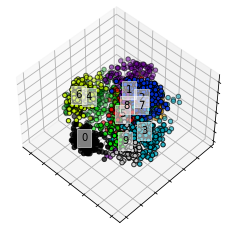

In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
X1 = scaler.fit_transform(X)
cov = np.cov(X1, rowvar=False)

In [ ]:
cov.shape

(64, 64)

In [ ]:
w, v = np.linalg.eig(cov)

In [ ]:
w

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [ ]:
idx = np.argsort(w)[::-1]

In [ ]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 38, 39, 41, 42, 43, 54, 57, 59, 60, 58, 56, 55, 53, 52,
       51, 50, 49, 48, 47, 46, 45, 44, 40, 37, 61, 62, 63])

In [ ]:
v = v[:, idx]

In [ ]:
X_pca = X1 @ v[:, [i for i in range(0, 15)]]

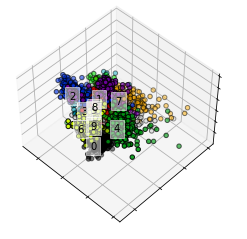

In [ ]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()